In [1]:
from PIL import Image
import numpy as np
from matplotlib import cm

In [2]:
arr88 = np.array([[52, 55, 61, 66, 70, 61, 64, 73],
                  [63, 59, 55, 90, 109 ,85, 69, 72],
                  [62, 59, 68, 113, 144, 104, 66, 73],
                  [63, 58, 71, 122, 154, 106, 70, 69],
                  [67, 61, 68, 104, 126, 88, 68, 70],
                  [79, 65, 60, 70, 77, 68, 58, 75],
                  [85, 71, 64, 59, 55, 61, 65, 83],
                  [87, 79, 69, 68, 65, 76, 78, 94]])

arr88

array([[ 52,  55,  61,  66,  70,  61,  64,  73],
       [ 63,  59,  55,  90, 109,  85,  69,  72],
       [ 62,  59,  68, 113, 144, 104,  66,  73],
       [ 63,  58,  71, 122, 154, 106,  70,  69],
       [ 67,  61,  68, 104, 126,  88,  68,  70],
       [ 79,  65,  60,  70,  77,  68,  58,  75],
       [ 85,  71,  64,  59,  55,  61,  65,  83],
       [ 87,  79,  69,  68,  65,  76,  78,  94]])

In [3]:
def create_D8():
    D8 = np.zeros((8,8), dtype = float)
    D8[0,:] = 1 / np.sqrt(2)

    for i in range(1, 8):
        for j in range(8):
            D8[i,j] = np.cos(np.pi * (i + 2 * i * j) / 16)

    D8 /= 2
    return D8

D8 = create_D8()
D8

array([[ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
         0.35355339,  0.35355339,  0.35355339],
       [ 0.49039264,  0.41573481,  0.27778512,  0.09754516, -0.09754516,
        -0.27778512, -0.41573481, -0.49039264],
       [ 0.46193977,  0.19134172, -0.19134172, -0.46193977, -0.46193977,
        -0.19134172,  0.19134172,  0.46193977],
       [ 0.41573481, -0.09754516, -0.49039264, -0.27778512,  0.27778512,
         0.49039264,  0.09754516, -0.41573481],
       [ 0.35355339, -0.35355339, -0.35355339,  0.35355339,  0.35355339,
        -0.35355339, -0.35355339,  0.35355339],
       [ 0.27778512, -0.49039264,  0.09754516,  0.41573481, -0.41573481,
        -0.09754516,  0.49039264, -0.27778512],
       [ 0.19134172, -0.46193977,  0.46193977, -0.19134172, -0.19134172,
         0.46193977, -0.46193977,  0.19134172],
       [ 0.09754516, -0.27778512,  0.41573481, -0.49039264,  0.49039264,
        -0.41573481,  0.27778512, -0.09754516]])

In [4]:
J = D8 @ (arr88 - 128) @ D8.T

J

array([[-4.15375000e+02, -3.01857173e+01, -6.11970620e+01,
         2.72393225e+01,  5.61250000e+01, -2.00951738e+01,
        -2.38764710e+00,  4.61815442e-01],
       [ 4.46552370e+00, -2.18574393e+01, -6.07580381e+01,
         1.02536368e+01,  1.31451101e+01, -7.08741801e+00,
        -8.53543671e+00,  4.87688850e+00],
       [-4.68344847e+01,  7.37059735e+00,  7.71293876e+01,
        -2.45619822e+01, -2.89116884e+01,  9.93352095e+00,
         5.41681547e+00, -5.64895086e+00],
       [-4.85349667e+01,  1.20683609e+01,  3.40997672e+01,
        -1.47594111e+01, -1.02406068e+01,  6.29596744e+00,
         1.83116505e+00,  1.94593651e+00],
       [ 1.21250000e+01, -6.55344993e+00, -1.31961210e+01,
        -3.95142773e+00, -1.87500000e+00,  1.74528445e+00,
        -2.78722825e+00,  3.13528230e+00],
       [-7.73474368e+00,  2.90546138e+00,  2.37979576e+00,
        -5.93931394e+00, -2.37779671e+00,  9.41391596e-01,
         4.30371334e+00,  1.84869103e+00],
       [-1.03067401e+00,  1.830674

In [5]:
J = np.around(J).astype(int)
J

array([[-415,  -30,  -61,   27,   56,  -20,   -2,    0],
       [   4,  -22,  -61,   10,   13,   -7,   -9,    5],
       [ -47,    7,   77,  -25,  -29,   10,    5,   -6],
       [ -49,   12,   34,  -15,  -10,    6,    2,    2],
       [  12,   -7,  -13,   -4,   -2,    2,   -3,    3],
       [  -8,    3,    2,   -6,   -2,    1,    4,    2],
       [  -1,    0,    0,   -2,   -1,   -3,    4,   -1],
       [   0,    0,   -1,   -4,   -1,    0,    1,    2]])

In [6]:
def create_Q(q = 50):
    Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                  [12, 12, 14, 19, 26, 58, 60, 55],
                  [14, 13, 16, 24, 40, 57, 69, 56],
                  [14, 17, 22, 29, 51, 87, 80, 62],
                  [18, 22, 37, 56, 68, 109, 103, 77],
                  [24, 35, 55, 64, 81, 104, 113, 92],
                  [49, 64, 78, 87, 103, 121, 120, 101],
                  [72, 92, 95, 98, 112, 100, 103, 99]])
    
    if q < 50:
        alpha = 5000 / q
    else:
        alpha = 200 - (2 * q)
        
    Q = (alpha * Q + 50) / 100
    Q = np.floor(Q).astype(int)
    
    return Q


Q = create_Q()
Q

array([[ 16,  11,  10,  16,  24,  40,  51,  61],
       [ 12,  12,  14,  19,  26,  58,  60,  55],
       [ 14,  13,  16,  24,  40,  57,  69,  56],
       [ 14,  17,  22,  29,  51,  87,  80,  62],
       [ 18,  22,  37,  56,  68, 109, 103,  77],
       [ 24,  35,  55,  64,  81, 104, 113,  92],
       [ 49,  64,  78,  87, 103, 121, 120, 101],
       [ 72,  92,  95,  98, 112, 100, 103,  99]])

In [7]:
K = J / Q
K = np.around(K).astype(int)

K

array([[-26,  -3,  -6,   2,   2,   0,   0,   0],
       [  0,  -2,  -4,   1,   0,   0,   0,   0],
       [ -3,   1,   5,  -1,  -1,   0,   0,   0],
       [ -4,   1,   2,  -1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [8]:
def zigzag(K):
    flippedK = K[::-1,:]
    zig = np.zeros((0), dtype = int)
    for k in range(1-K.shape[0], K.shape[0]):
        diagonalK = np.diagonal(flippedK, k)
        if k % 2 == 0:
            diagonalK = diagonalK[::-1]
        zig = np.concatenate([zig, diagonalK])
    return zig
    
zig = zigzag(K)
zig

array([-26,  -3,   0,  -3,  -2,  -6,   2,  -4,   1,  -4,   1,   1,   5,
         1,   2,   0,   0,  -1,   2,   0,   0,   0,   0,   0,  -1,  -1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [9]:
def eliminate_zero(zig):
    zero_count = len(zig)
    for i in range(len(zig) - 1, -1, -1):
        if zig[i] != 0:
            zero_count = len(zig) - i - 1
            break

    return zig[:len(zig) - zero_count]

zig_without_zero = eliminate_zero(zig)
len(zig) / len(zig_without_zero)

2.4615384615384617

# Décompression

In [10]:
def read_zero(zig_without_zero):
    _zig = np.zeros((64), dtype=int)
    _zig[:len(zig_without_zero)] = zig_without_zero
    return _zig

_zig = read_zero(zig_without_zero)
_zig

array([-26,  -3,   0,  -3,  -2,  -6,   2,  -4,   1,  -4,   1,   1,   5,
         1,   2,   0,   0,  -1,   2,   0,   0,   0,   0,   0,  -1,  -1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [11]:
def zigzag_reverse(_zig):
    _K = np.zeros((8,8), dtype=int)
    x, y = 0, 0
    down = True
    # x -> column
    # y -> row
    maxY, maxX = _K.shape
    for v in _zig:
        _K[x, y] = v
        if down:
            x -= 1
            y += 1
            if x < 0:
                down = False
                x += 1
            if y >= maxY:
                down = False
                x += 2
                y -= 1
        else:
            x += 1
            y -= 1
            if x >= maxX:
                down = True
                x -= 1
                y += 2
            if y < 0:
                down = True
                y += 1
    return _K

_K = zigzag_reverse(_zig)
_K

array([[-26,  -3,  -6,   2,   2,   0,   0,   0],
       [  0,  -2,  -4,   1,   0,   0,   0,   0],
       [ -3,   1,   5,  -1,  -1,   0,   0,   0],
       [ -4,   1,   2,  -1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [12]:
_J = _K * Q
_J

array([[-416,  -33,  -60,   32,   48,    0,    0,    0],
       [   0,  -24,  -56,   19,    0,    0,    0,    0],
       [ -42,   13,   80,  -24,  -40,    0,    0,    0],
       [ -56,   17,   44,  -29,    0,    0,    0,    0],
       [  18,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]])

In [13]:
_arr88 = (D8.T @ _J @ D8) + 128


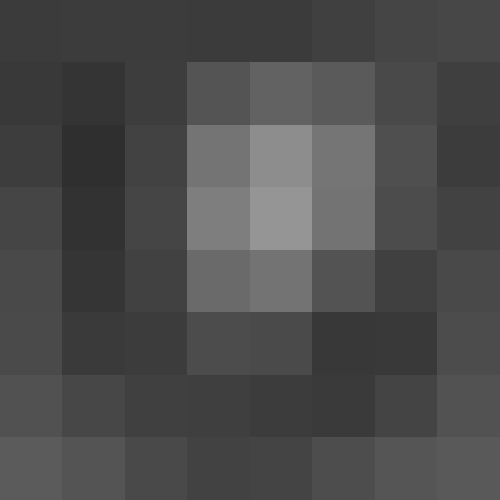

In [14]:
def show_arr(arr):
    x, y = arr.shape
    arr2 = np.zeros((x, y, 2), dtype = int)
    arr2[:,:,0] = arr[:,:]
    arr2[:,:,1] = 255
    return Image.fromarray(np.uint8(arr2)).resize((500,500), Image.NEAREST)

show_arr(_arr88)

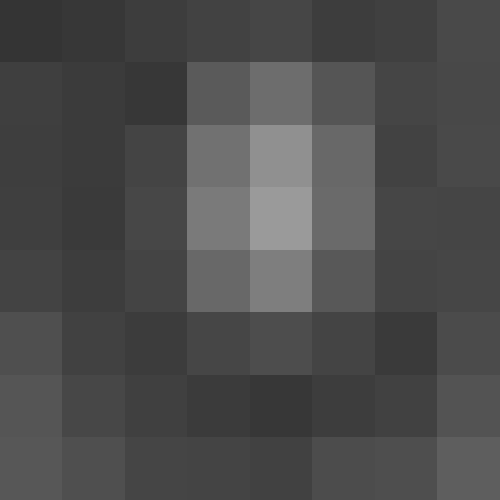

In [15]:

show_arr(arr88)

In [16]:
arr88

array([[ 52,  55,  61,  66,  70,  61,  64,  73],
       [ 63,  59,  55,  90, 109,  85,  69,  72],
       [ 62,  59,  68, 113, 144, 104,  66,  73],
       [ 63,  58,  71, 122, 154, 106,  70,  69],
       [ 67,  61,  68, 104, 126,  88,  68,  70],
       [ 79,  65,  60,  70,  77,  68,  58,  75],
       [ 85,  71,  64,  59,  55,  61,  65,  83],
       [ 87,  79,  69,  68,  65,  76,  78,  94]])

In [17]:
_arr88

array([[ 59.53600012,  60.88612722,  60.78742912,  59.2773395 ,
         59.90382799,  64.08191242,  69.01345141,  71.78923396],
       [ 57.71514823,  52.78415377,  61.6126308 ,  84.72169533,
         98.47694098,  90.291222  ,  73.49597995,  63.62235796],
       [ 61.40312959,  47.92584165,  66.22544309, 116.35086565,
        141.70943524, 117.14979544,  79.07723159,  60.5627253 ],
       [ 69.40423568,  50.12737124,  69.87488216, 126.79392839,
        149.56979994, 115.30599074,  76.99777766,  66.80057639],
       [ 73.43195578,  53.70162947,  65.75032514, 106.33854362,
        115.3479698 ,  83.89551918,  64.95963034,  73.45115352],
       [ 74.7933654 ,  58.99665507,  60.05674643,  76.38593875,
         74.22396066,  56.0608229 ,  57.58985604,  76.94865962],
       [ 81.81932002,  71.241129  ,  64.18445834,  63.61493012,
         60.91001116,  58.89064701,  68.41738693,  82.74151598],
       [ 91.35877166,  84.23265155,  73.66664225,  66.66361834,
         68.49875031,  77.109065 

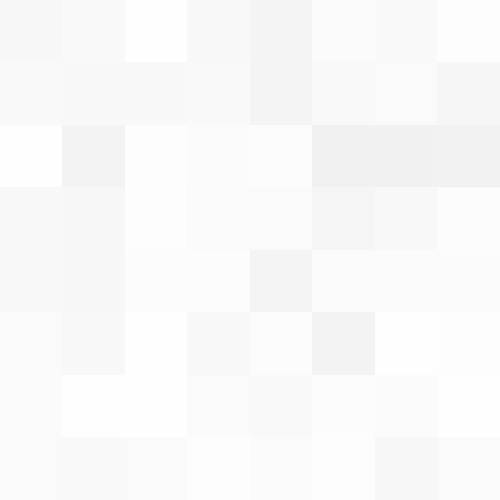

In [18]:
show_arr(255 - np.abs(arr88 - _arr88))

In [19]:
def load_grayscale(path):
    im = Image.open(path).convert('LA')
    arr = np.array(im)
    arr = arr[:,:,:-1]
    return arr[:,:,0]

#arr = load_grayscale("randompic_color.png")
#arr

In [20]:
# Return a numpy array containing chunks of 8x8 pixels (It is then an x*y*8*8 array) and the dimensions of the image
def separateChuncks(array, chunk_size = 8):
    # Chunks dimensions
    (arrX, arrY) = array.shape
    (x, y) = (int(np.ceil(arrX / chunk_size)), int(np.ceil(arrY / chunk_size)))
    
    # Create the chunks array
    chunks = np.zeros((x, y, chunk_size, chunk_size))
    
    # Iterate chunk
    for (i, j) in np.ndindex(x, y):
        # The point we start from in array
        (startX, startY) = (i * chunk_size, j * chunk_size)
        
        # The limit of the chunk for the padding
        (clipX, clipY) = (arrX % chunk_size if startX + chunk_size > arrX else chunk_size, arrY % chunk_size if startY + chunk_size > arrY else chunk_size)
        
        # Copy the 8x8 chunk
        chunks[i, j][:clipX, :clipY] = array[startX:startX + clipX, startY:startY + clipY]
        
    return (chunks, (arrX, arrY))

In [21]:
def compressChunk(chunk, D8, Q, x, y):
    J = D8 @ (chunk - 128) @ D8.T
    J = np.around(J).astype(int)
    K = J / Q
    K = np.around(K).astype(int)
    zig = zigzag(K)
    zig_without_zero = eliminate_zero(zig)
    ratio = 0
    if len(zig_without_zero) != 0:
        ratio = len(zig) / len(zig_without_zero)
    else:
        print(x, y)
    return zig_without_zero, ratio

In [22]:
def compress(path, quality = 50):
    D8 = create_D8()
    Q = create_Q(quality)
    arr = load_grayscale(path)
    chunks, dimensions = separateChuncks(arr)
    x, y, _, _ = chunks.shape
    zigs = []
    for (i, j) in np.ndindex(x, y):
        if i >= len(zigs):
            zigs.append([])
        zig_without_zero, ratio = compressChunk(chunks[i][j], D8, Q, i, j)
        zigs[i].append(zig_without_zero)
    return zigs, dimensions

In [23]:
# Recreate the original array from chunks
def combineChunks(chunks, dimensions, chunk_size = 8):
    # Array outputed
    array = np.empty(dimensions)
    
    for (i, j, cx, cy) in np.ndindex(chunks.shape):
        # Coordinate of the pixel
        (x, y) = i * chunk_size + cx, j * chunk_size + cy
        if (x < dimensions[0] and y < dimensions[1]):
            array[x, y] = chunks[i, j, cx, cy]
    
    return array

In [24]:
def decompress(zigs, dimensions, quality = 50):
    D8 = create_D8()
    Q = create_Q(quality)
    x = len(zigs)
    y = len(zigs[0])
    chunks = np.zeros((x, y, 8, 8))
    for (i, j) in np.ndindex(x, y):
        _zig = read_zero(zigs[i][j])
        _K = zigzag_reverse(_zig)
        _J = _K * Q
        _arr88 = (D8.T @ _J @ D8) + 128
        chunks[i][j] = _arr88
    _arr = combineChunks(chunks, dimensions)
    return _arr
        

0 0
0 1
0 2
0 13
0 14
0 15
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 30
0 32
0 33
1 0
1 1
1 2
1 3
1 5
1 6
1 13
1 14
1 15
1 16
1 17
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 30
1 31
2 1
2 2
2 3
2 4
2 13
2 14
2 15
2 16
2 17
2 18
2 20
2 21
2 22
2 23
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
3 0
3 1
3 2
3 3
3 4
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 21
3 22
3 23
3 24
3 27
3 30
3 31
3 32
3 39
3 40
3 42
4 0
4 1
4 2
4 3
4 6
4 12
4 13
4 14
4 16
4 17
4 19
4 20
4 22
4 23
4 24
4 25
4 29
4 30
4 31
4 33
4 36
4 37
4 39
4 41
4 42
4 43
5 0
5 1
5 2
5 5
5 6
5 13
5 14
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
6 0
6 1
6 5
6 6
6 10
6 11
6 12
6 13
6 14
6 15
6 21
6 22
6 23
6 24
6 25
6 27
6 28
6 29
6 30
6 31
6 37
6 38
6 39
6 40
6 41
6 42
6 44
7 0
7 1
7 2
7 3
7 4
7 5
7 12
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
8 0
8 1
8 2
8 3
8 4
8 5
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23

42 51
42 52
42 54
42 55
42 56
42 57
43 9
43 11
43 12
43 13
43 14
43 15
43 16
43 25
43 26
43 34
43 35
43 36
43 37
43 44
43 45
43 46
43 47
43 49
43 50
43 51
43 52
43 53
43 54
43 55
43 56
43 57
44 9
44 12
44 13
44 14
44 15
44 16
44 17
44 18
44 19
44 25
44 26
44 34
44 35
44 45
44 46
44 50
44 51
44 52
44 53
44 54
44 55
44 56
44 57
45 13
45 14
45 15
45 16
45 17
45 18
45 19
45 20
45 25
45 26
45 34
45 41
45 42
45 43
45 45
45 48
45 49
45 50
45 51
45 52
45 53
45 54
45 55
45 56
45 57
45 58
46 15
46 16
46 21
46 25
46 37
46 38
46 39
46 44
46 45
46 46
46 47
46 50
46 51
46 52
46 53
46 54
46 55
46 56
47 21
47 22
47 37
47 38
47 42
47 43
47 44
47 45
47 46
47 47
47 48
47 49
47 50
47 51
47 52
47 53
47 54
47 55
47 57
48 22
48 35
48 37
48 38
48 42
48 44
48 45
48 46
48 47
48 48
48 49
48 50
48 51
48 52
48 53
48 54
49 22
49 31
49 32
49 35
49 36
49 38
49 39
49 46
49 49
49 50
49 52
49 53
49 54
49 58
49 59
49 60
49 61
50 30
50 31
50 32
50 34
50 35
50 36
50 37
50 38
50 39
50 49
50 50
50 51
50 52
50 53
50 54
50 55


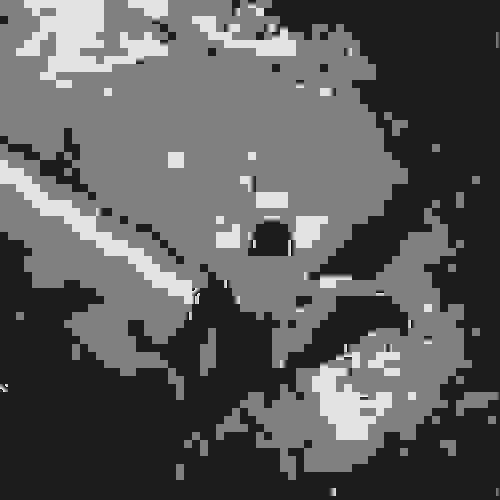

In [42]:
zigs, dimensions = compress("randompic_color.png", 1)
_arr = decompress(zigs, dimensions, 1)
show_arr(_arr)

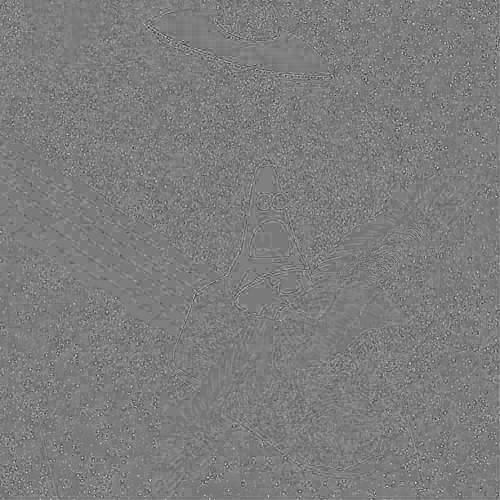

In [41]:
arr = load_grayscale("randompic_color.png")
show_arr(125 + arr - _arr)